In [30]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [31]:
sales = pd.read_csv('../csvs/all_sales.csv')
sales.sale_time = sales.sale_time.astype("datetime64[ns]")
sales.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1.1.1,sale_id,ape_id,sale_price,sale_time,seller_name,seller_wallet,buyer_name,buyer_wallet
0,0,0.0,0.0,0.0,1470246435,ApeGang #4226,0.490,2021-10-21 08:27:51.055386,NaN,0xf25018fbf9d07db0e02c36824da7b444bb3c2379,diogopunk3,0xf3ba73e6d3d19cf0405486db3d44404c35b78b80
1,1,1.0,1.0,0.0,1469983558,ApeGang #9793,0.002,2021-10-21 08:01:12.181661,NaN,0x02dd1c87ccd51bfd12c5e4c04eb3ed9224ea9400,NaN,0x1d516bdec43122415726b676796736caa3cd319d
2,2,2.0,2.0,0.0,1468894965,ApeGang #2196,0.500,2021-10-21 06:11:33.290535,NaN,0x9fe59ab5ac6c00a80f5c05acd3071a22b61f25bf,GeeMoney,0x0f9ac6fdbc287c7b8d29a139845963e4f513fe15
3,3,3.0,3.0,0.0,1468769122,ApeGang #2061,0.490,2021-10-21 05:59:06.139219,NaN,0x82b04eb793777a10de5e54b6235396e60d0e4b5f,NaN,0xcfb398f869dab6f1c70c5afb6728612fad06fa8c
4,4,4.0,4.0,0.0,1468061535,ApeGang #8081,0.500,2021-10-21 04:51:32.215490,NaN,0x4f3553aa0789cbfffa469758284190cd072163bc,NaN,0xaab5612de1413e7ceb0f5deaaf27d3f85852b3b9


In [32]:
sales.shape

(10207, 12)

In [33]:
recent_sales = sales[sales.sale_time > dt.datetime(2021, 9, 1)]
recent_sales.shape

(5968, 12)

In [34]:
#how many cheap apes under .1ETH
recent_sales[recent_sales['sale_price']<0.1].shape

(13, 12)

In [35]:
#How many expensive apes over 3 ETH
recent_sales[recent_sales['sale_price']>3].shape

(42, 12)

In [36]:
apes = pd.read_csv('../csvs/all_the_apes.csv')
apes.head()
apes.shape

(10000, 8)

In [37]:
ape_sales = recent_sales.merge(apes, on="ape_id", how="left")
ape_sales = ape_sales[['ape_id','sale_price','sale_time','Clothes','Ears','Hat','Fur','Mouth','Eyes']]
ape_sales['trait_n'] = ape_sales[['Clothes','Ears','Hat','Fur','Mouth','Eyes']].count(axis=1)
ape_sales.shape

(5968, 10)

In [38]:
ape_sales['day'] =ape_sales['sale_time'].dt.date
sales_by_date = ape_sales.groupby('day').count().sale_price

In [39]:
ape_sales = ape_sales[ape_sales['sale_price']>0.01] 
ape_sales.shape

(5963, 11)

In [40]:
ape_sales = ape_sales.join(ape_sales.groupby('day').median().sale_price, rsuffix='_daily_avg',on='day')
ape_sales.head()

,ape_id,sale_price,sale_time,Clothes,Ears,Hat,Fur,Mouth,Eyes,trait_n,day,sale_price_daily_avg
0,ApeGang #4226,0.49,2021-10-21 08:27:51.055386,Orange Striped T-Shirt,NaN,Green Beanie,Brown,Grin Gold,Diving Mask,5,2021-10-21,0.4825
2,ApeGang #2196,0.50,2021-10-21 06:11:33.290535,NaN,NaN,Yellow NBA Headband,Brown,Grillz,Hippie Glasses,4,2021-10-21,0.4825
3,ApeGang #2061,0.49,2021-10-21 05:59:06.139219,Hotel Porter,NaN,Brown Beanie,Brown,Yawn,NaN,4,2021-10-21,0.4825
4,ApeGang #8081,0.50,2021-10-21 04:51:32.215490,Military,NaN,NaN,Brown,Cigarette,Crazy,4,2021-10-21,0.4825
5,ApeGang #9884,0.48,2021-10-21 04:48:49.110108,Blue Hoodie,NaN,NaN,Zebra,Mustache,Monocle,4,2021-10-21,0.4825


In [41]:
ape_sales['price_diff'] = ape_sales.sale_price - ape_sales.sale_price_daily_avg
ape_sales.head(20)

,ape_id,sale_price,sale_time,Clothes,Ears,Hat,Fur,Mouth,Eyes,trait_n,day,sale_price_daily_avg,price_diff
0,ApeGang #4226,0.4900,2021-10-21 08:27:51.055386,Orange Striped T-Shirt,NaN,Green Beanie,Brown,Grin Gold,Diving Mask,5,2021-10-21,0.4825,0.0075
2,ApeGang #2196,0.5000,2021-10-21 06:11:33.290535,NaN,NaN,Yellow NBA Headband,Brown,Grillz,Hippie Glasses,4,2021-10-21,0.4825,0.0175
3,ApeGang #2061,0.4900,2021-10-21 05:59:06.139219,Hotel Porter,NaN,Brown Beanie,Brown,Yawn,NaN,4,2021-10-21,0.4825,0.0075
4,ApeGang #8081,0.5000,2021-10-21 04:51:32.215490,Military,NaN,NaN,Brown,Cigarette,Crazy,4,2021-10-21,0.4825,0.0175
5,ApeGang #9884,0.4800,2021-10-21 04:48:49.110108,Blue Hoodie,NaN,NaN,Zebra,Mustache,Monocle,4,2021-10-21,0.4825,-0.0025
6,ApeGang #8550,0.4880,2021-10-21 04:27:47.224107,NaN,Airpods,Green Beanie,Brown,Tongue Out,Hippie Glasses,5,2021-10-21,0.4825,0.0055
7,ApeGang #213,0.4890,2021-10-21 03:59:38.139868,NaN,NaN,NaN,Strong Dark Brown,Grin Gold,Eye Patch,3,2021-10-21,0.4825,0.0065
8,ApeGang #9884,0.3500,2021-10-21 03:18:02.664485,Blue Hoodie,NaN,NaN,Zebra,Mustache,Monocle,4,2021-10-21,0.4825,-0.1325
9,ApeGang #9526,0.4900,2021-10-21 02:48:50.804173,Lab Coat,NaN,Yellow NBA Headband,Brown,Cigarette,Bruised,5,2021-10-21,0.4825,0.0075
10,ApeGang #2158,0.8000,2021-10-21 02:30:24.757739,NaN,Diamond Stud,Nurse,Strong Dark Brown,Flames,Gold Sunglasses,5,2021-10-21,0.4825,0.3175


In [42]:
df = pd.get_dummies(ape_sales[['Clothes','Ears','Hat','Fur','Mouth','Eyes','price_diff','trait_n','ape_id']],
                    columns = ['Clothes','Ears','Hat','Fur','Mouth','Eyes'])
list(df.columns)

['price_diff',
 'trait_n',
 'ape_id',
 'Clothes_Angel Wings',
 'Clothes_Banana Shirt',
 'Clothes_Batman',
 'Clothes_Black Suit',
 'Clothes_Black Tank Top',
 'Clothes_Blue Hoodie',
 'Clothes_Cop',
 'Clothes_Devil Wings',
 'Clothes_Fireman',
 'Clothes_Grey Striped T-Shirt',
 'Clothes_Groom',
 'Clothes_Hippie',
 'Clothes_Hotel Porter',
 'Clothes_Indian',
 'Clothes_Iron Man',
 'Clothes_Joker',
 'Clothes_Lab Coat',
 'Clothes_Lumberjack',
 'Clothes_Magician',
 'Clothes_Mexican',
 'Clothes_Military',
 'Clothes_Nurse',
 'Clothes_Orange Hawaiian Shirt ',
 'Clothes_Orange Striped T-Shirt',
 'Clothes_Pimp Coat',
 'Clothes_Pirate',
 'Clothes_Prison Jumpsuit',
 'Clothes_Purple Hoodie',
 'Clothes_Red Hawaiian Shirt',
 'Clothes_Red NBA Jersey',
 'Clothes_Sheriff',
 'Clothes_Space Suit',
 'Clothes_Toga',
 'Clothes_Vader',
 'Clothes_White Tank Top',
 'Clothes_Winter Coat',
 'Clothes_Yellow NBA Jersey',
 'Ears_Airpods',
 'Ears_Bluetooth Earpiece',
 'Ears_Diamond Stud',
 'Ears_Gold Hoop',
 'Ears_Silver H

In [43]:
pd.set_option('display.max_columns', None)
df[df.ape_id =='ApeGang #2196']
df = df.drop(columns='ape_id')

In [44]:
num_cols = ['price_diff','trait_n']
df[num_cols].isnull().sum() # no missing values


price_diff    0
trait_n       0
dtype: int64

In [45]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [46]:
df.head()
x= df.drop(columns='price_diff')
y= df['price_diff']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [49]:
y_pred = rf.predict(X_test)


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6119611695800983

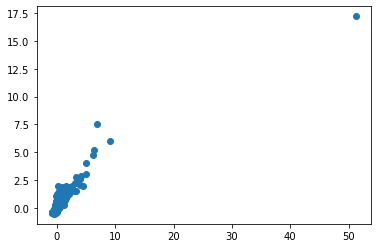

In [51]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, 'o')


Text(0.5, 0, 'Random Forest Feature Importance')

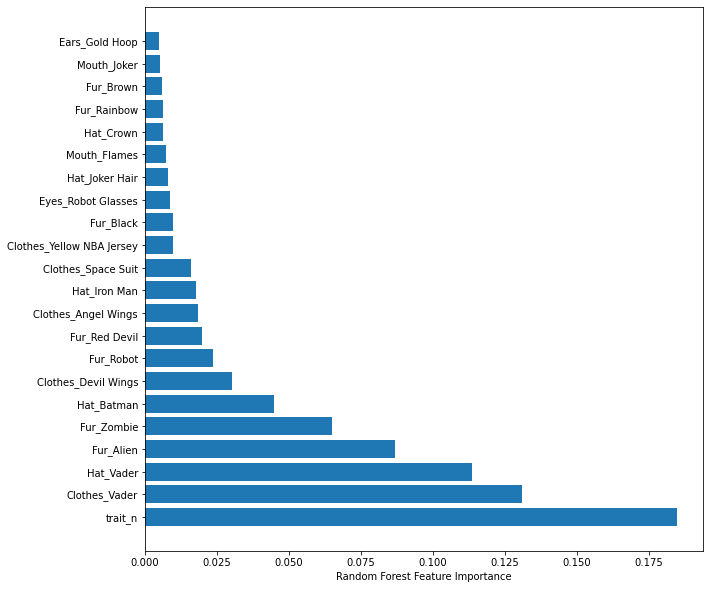

In [55]:
#look at feature importances
sorted_idx = rf.feature_importances_.argsort()[::-1]
#x.columns[sorted_idx]
plt.figure(figsize=(10,10))
plt.barh(x.columns[sorted_idx[0:22]], rf.feature_importances_[sorted_idx[0:22]])
plt.xlabel("Random Forest Feature Importance")

In [61]:
#persist model in memory
from joblib import dump, load
dump(rf, '../models/randomforest.joblib') 

['../models/randomforest.joblib']

In [58]:
#load model back into memory
clf = load('filename.joblib') 